In [1]:
import pandas as pd

In [2]:
auto_df = pd.read_csv('./data/Auto.csv')

In [7]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
auto_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto_df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [6]:
auto_df.origin.unique()

array([1, 3, 2], dtype=int64)

### Data Cleaning

In [8]:
auto_df[-auto_df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [9]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors = 'coerce')

In [11]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [12]:
auto_df[auto_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [13]:
auto_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

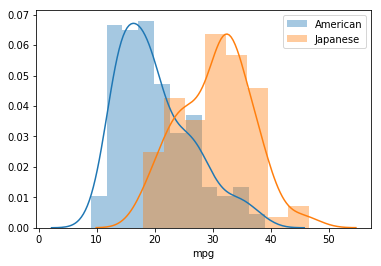

In [18]:
sn.distplot( auto_df[auto_df.origin == 1]['mpg'], label = 'American')
sn.distplot( auto_df[auto_df.origin == 3]['mpg'], label = 'Japanese')
plt.legend()

In [23]:
auto_df = auto_df.dropna() # to drop null values

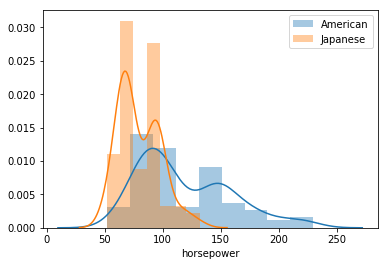

In [22]:
sn.distplot( auto_df[auto_df.origin == 1]['horsepower'].dropna(), label = 'American')
sn.distplot( auto_df[auto_df.origin == 3]['horsepower'].dropna(), label = 'Japanese')
plt.legend()

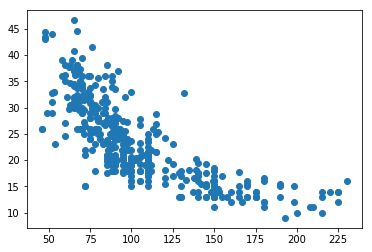

In [24]:
plt.scatter(auto_df.horsepower, auto_df.mpg)

In [25]:
cols = ['horsepower','mpg']

In [26]:
auto_df[cols].corr()

,horsepower,mpg
horsepower,1.000000,-0.778427
mpg,-0.778427,1.000000


In [27]:
cols = ['horsepower','mpg', 'acceleration', 'weight']

In [28]:
auto_df[cols].corr()

,horsepower,mpg,acceleration,weight
horsepower,1.000000,-0.778427,-0.689196,0.864538
mpg,-0.778427,1.000000,0.423329,-0.832244
acceleration,-0.689196,0.423329,1.000000,-0.416839
weight,0.864538,-0.832244,-0.416839,1.000000


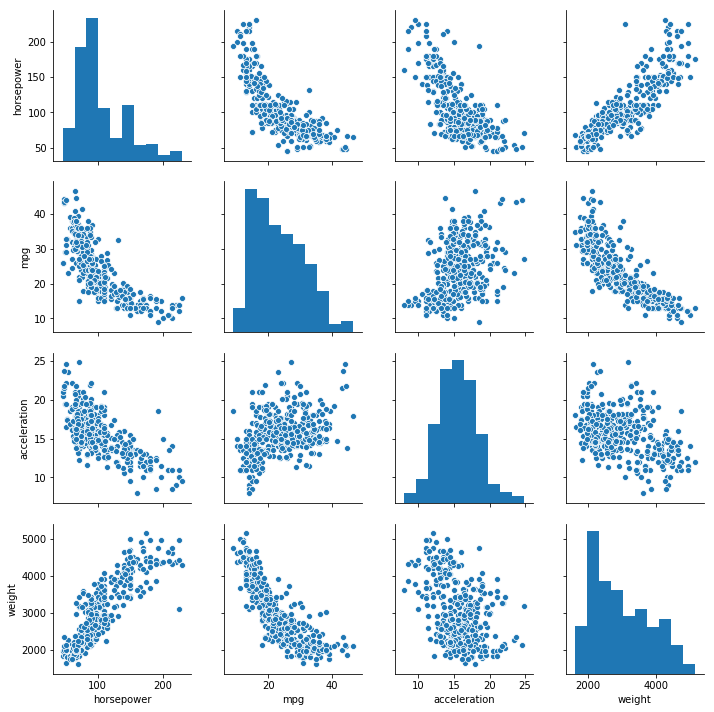

In [30]:
sn.pairplot(auto_df[cols])

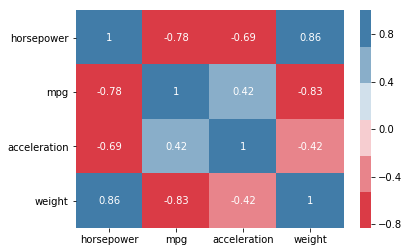

In [32]:
sn.heatmap(auto_df[cols].corr(), annot = True, cmap = sn.diverging_palette(10,240))

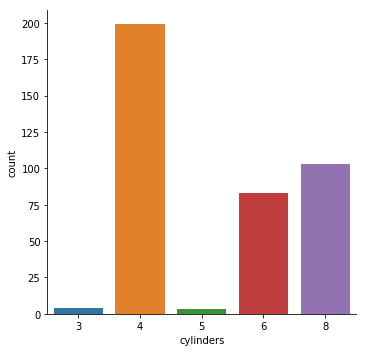

In [33]:
sn.catplot( data = auto_df, x = 'cylinders', kind = 'count'  )

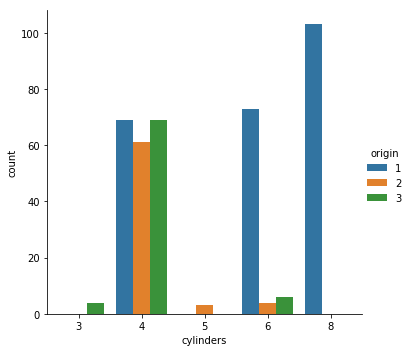

In [34]:
sn.catplot( data = auto_df, x = 'cylinders', kind = 'count', hue = 'origin'  )